<a href="https://colab.research.google.com/github/alex-punchenko/my_work/blob/main/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Learning

In [ ]:
import pandas as pd
import numpy as nu
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Data Loading

In [ ]:
!kaggle datasets download -d fedesoriano/heart-failure-prediction

!unzip heart-failure-prediction.zip

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
heart-failure-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  heart-failure-prediction.zip
replace heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: heart.csv               


In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Feature Engineering

In [ ]:
cat_col = df.select_dtypes(include=['object', 'category']).columns
cat_col

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [ ]:
df[cat_col].nunique()

,0
Sex,2
ChestPainType,4
RestingECG,3
ExerciseAngina,2
ST_Slope,3


In this case, I will transform categorical features using One Hot Encoder

In [ ]:
df = pd.get_dummies(df, columns=cat_col, drop_first=True)

In [ ]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


# Explore Data

## Checking Target Variable Balance

In [ ]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


## Distribution of Numerical Features

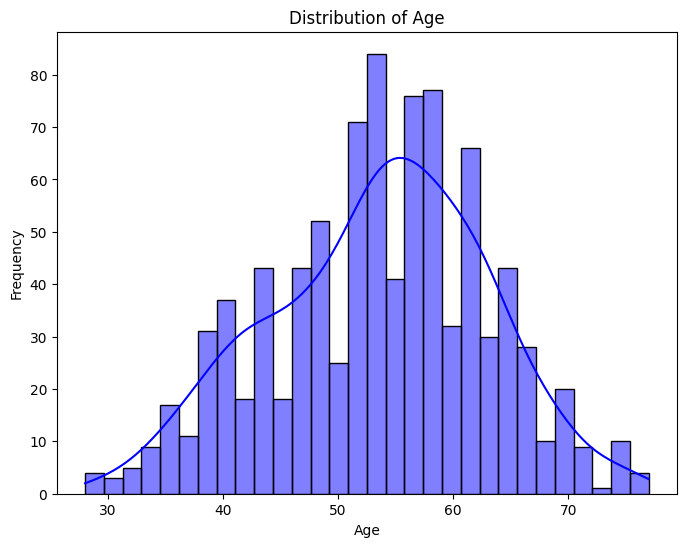

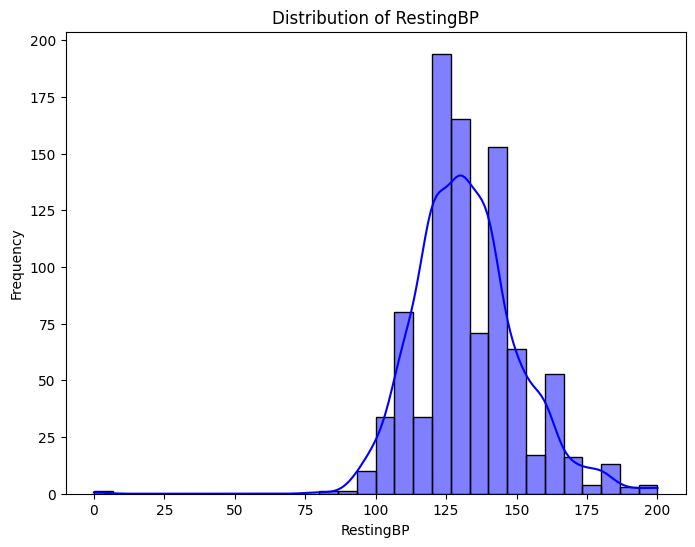

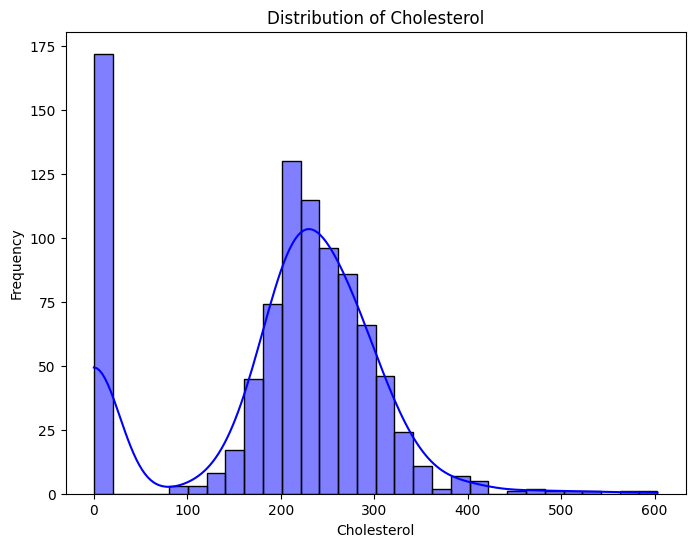

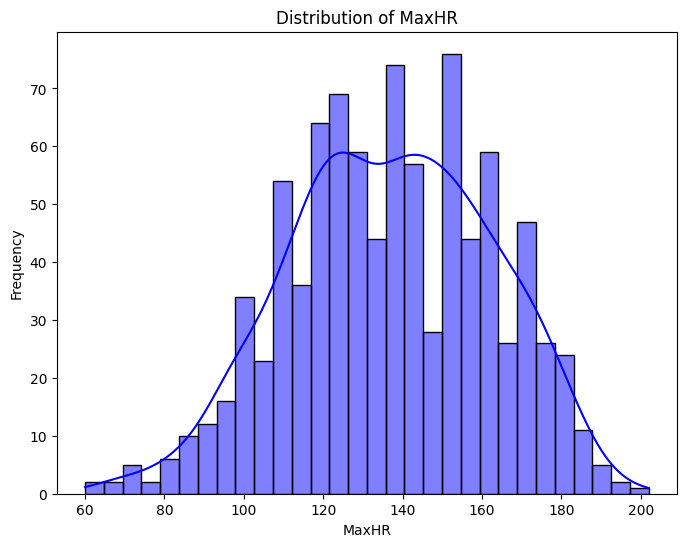

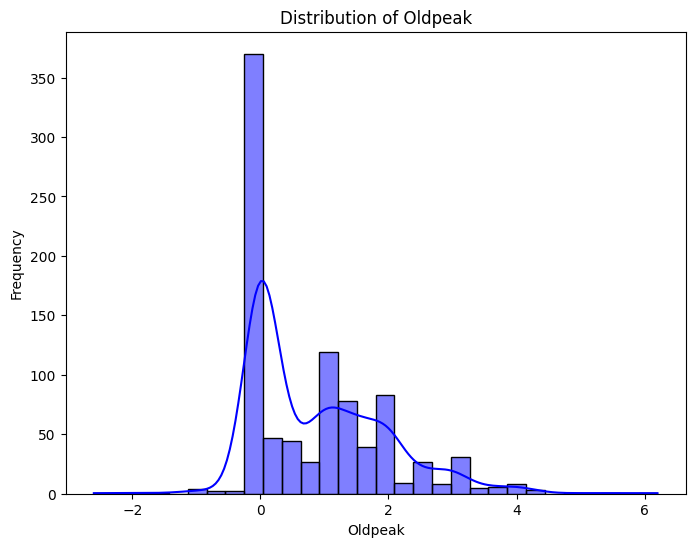

In [ ]:
for col in [col for col in df.columns if df[col].nunique() > 10]:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Correlation Matrix

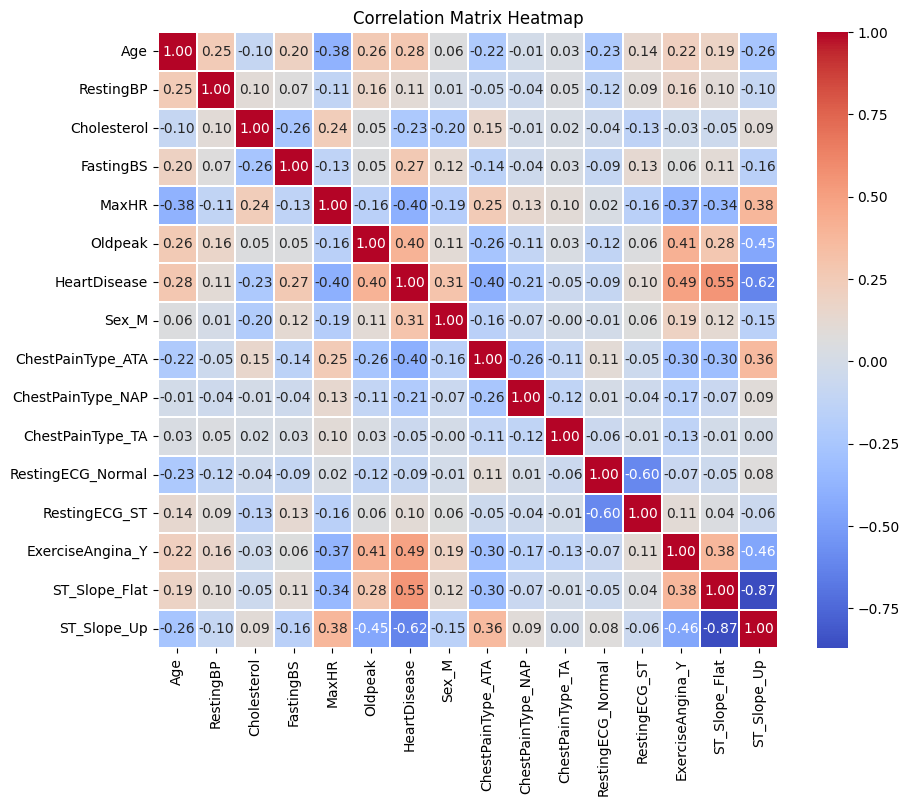

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.3, cbar=True)
plt.title('Correlation Matrix Heatmap')

plt.show()

# Splitting the Dataset into Training and Testing Subsets in an 80/20 Ratio

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x =  df.drop(columns='HeartDisease')
y = df['HeartDisease']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

#Model Creation

##  Decision Tree Classifier and Random Forest Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
dtc = DecisionTreeClassifier(random_state=1) # Decision Tree Classifier
dtc.fit(x_train,y_train)
y_pred_dtc = dtc.predict(x_test)

In [ ]:
rfc = RandomForestClassifier(random_state=1) # Random Forest Classifier
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)

### Model Metrics

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred_dtc)) # Decision Tree  Metrics

              precision    recall  f1-score   support

           0       0.68      0.73      0.70        74
           1       0.81      0.76      0.79       110

    accuracy                           0.75       184
   macro avg       0.74      0.75      0.74       184
weighted avg       0.75      0.75      0.75       184



In [ ]:
print(classification_report(y_test,y_pred_rfc)) # Random Forest Metrics

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        74
           1       0.90      0.94      0.92       110

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



### Feature importances  Decision Tree

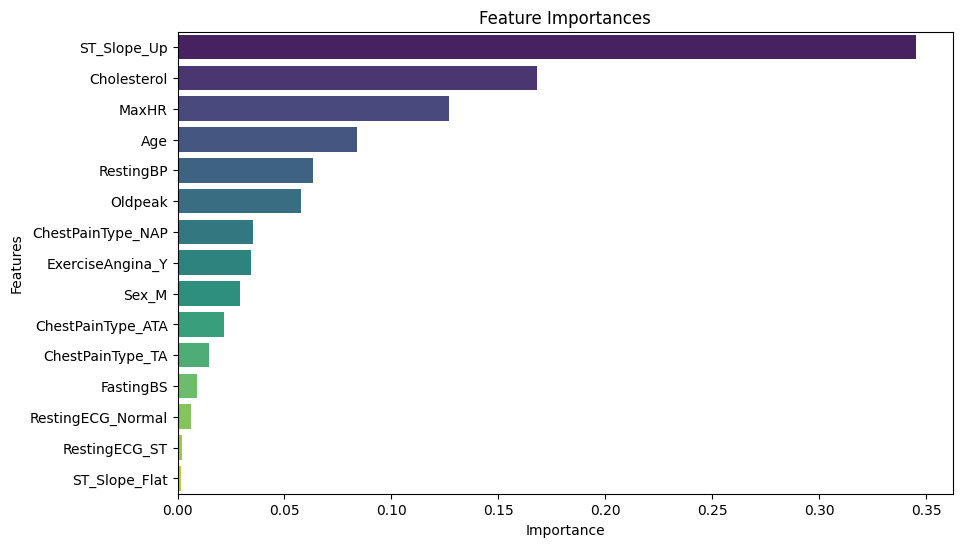

In [ ]:
# Feature importances Decision Tree
importances_dtc = dtc.feature_importances_

feature_importance_dtc = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances_dtc
})

# Sort values Feature importances
feature_importance_dtc = feature_importance_dtc.sort_values(by='Importance',ascending=False)

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature',
            data=feature_importance_dtc,
            palette='viridis')

plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')

plt.show()

### Feature importances Random Forest

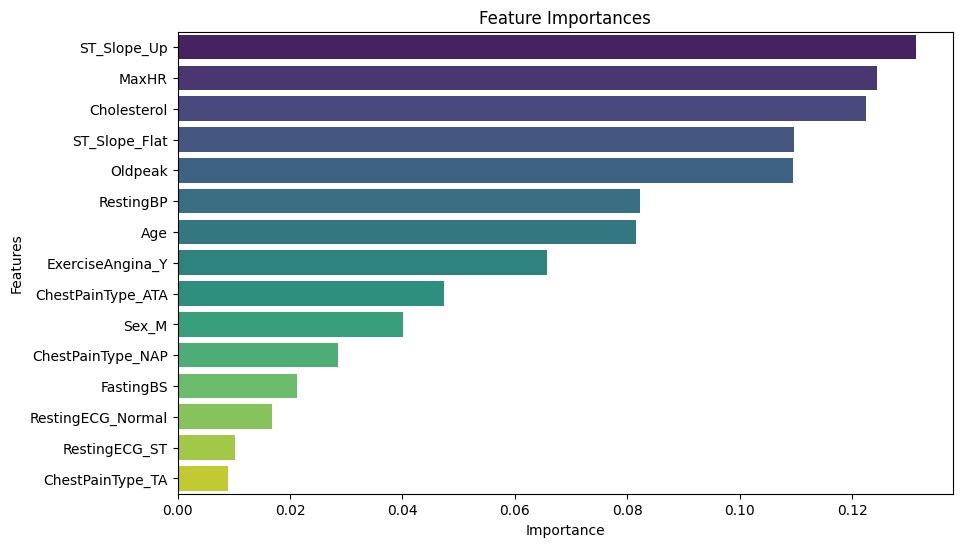

In [ ]:
# Feature importances Decision Tree
importances_rfc = rfc.feature_importances_

feature_importances_rfc = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances_rfc
})

# Sort values Feature importances
feature_importances_rfc = feature_importances_rfc.sort_values(by='Importance',ascending=False)

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature',
            data=feature_importances_rfc,
            palette='viridis')

plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')

plt.show()

## Bagging Classifier

### Metrics Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bc = BaggingClassifier(random_state=1) # Bagging Classifier
bc.fit(x_train,y_train)
y_pred_bc = bc.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred_bc)) #Bagging Classifier Metrics

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        74
           1       0.86      0.81      0.83       110

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.81      0.80      0.81       184



## LinearSVC

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
lsvc = LinearSVC(random_state=1)
lsvc.fit(x_train,y_train)
y_pred_lsvc = lsvc.predict(x_test)

### Metrics LinearSVC

In [ ]:
print(classification_report(y_test,y_pred_lsvc))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        74
           1       0.91      0.92      0.91       110

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



## **Stacking** Decision Tree Classifier + Random Forest Classifier + LinearSVC



In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
estimators = [
    ('dt', dtc),
    ('rfc', rfc),
    ('lsvc', lsvc)
    ]

stack_c = StackingClassifier(estimators=estimators)

In [ ]:
stack_c.fit(x_train, y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=1)),
                               ('rfc', RandomForestClassifier(random_state=1)),
                               ('lsvc', LinearSVC(random_state=1))])

In [ ]:
y_pred_stack = stack_c.predict(x_test)

### Metrics Stacking Classifier

In [ ]:
print(classification_report(y_test,y_pred_stack))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88        74
           1       0.92      0.93      0.92       110

    accuracy                           0.91       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184



# Comparing Results

In [ ]:
model_scores = {
    "Decision Tree Classifier": 0.75,
    "Random Forest": 0.90,
    "Bagging Classifier": 0.80,
    "LinearSVC": 0.90,
    "StackingClassifier": 0.91
}


df_scores = pd.DataFrame(list(model_scores.items()), columns=["Model", "F1 Score"])

df_scores.sort_values(by="F1 Score", ascending=False)

,Model,F1 Score
4,StackingClassifier,0.91
1,Random Forest,0.90
3,LinearSVC,0.90
2,Bagging Classifier,0.80
0,Decision Tree Classifier,0.75


# Conclusion

In this case, the best result was obtained by applying Stacking, as it uses the predictions of several models, each of which can excel in different aspects:

* Decision Tree works well with branching data and can capture complex patterns.
* Random Forest adds stability to overfitting by averaging the results of multiple trees.
* LinearSVC effectively identifies linear relationships.

It also helps balance bias and variance.